<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#define-X-and-y" data-toc-modified-id="define-X-and-y-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>define X and y</a></span></li></ul></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize the data</a></span></li><li><span><a href="#Set-up-a-model-and-train" data-toc-modified-id="Set-up-a-model-and-train-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up a model and train</a></span><ul class="toc-item"><li><span><a href="#train-the-model" data-toc-modified-id="train-the-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>train the model</a></span></li><li><span><a href="#visualize-the-centers" data-toc-modified-id="visualize-the-centers-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>visualize the centers</a></span></li></ul></li><li><span><a href="#Test-data" data-toc-modified-id="Test-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test data</a></span></li></ul></div>

# 2D数据类别划分

**任务:**

1、采用Kmeans算法实现2D数据自动聚类，预测V1=80,V2=60数据类别；

2、计算预测准确率，完成结果矫正

3、采用KNN、Meanshift算法，重复步骤1-2

数据：data.csv

## Load the data

In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


### define X and y

In [2]:
X = data.drop(['labels'], axis =1)
y = data.labels
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [3]:
y.value_counts()

2    1156
1     954
0     890
Name: labels, dtype: int64

## Visualize the data

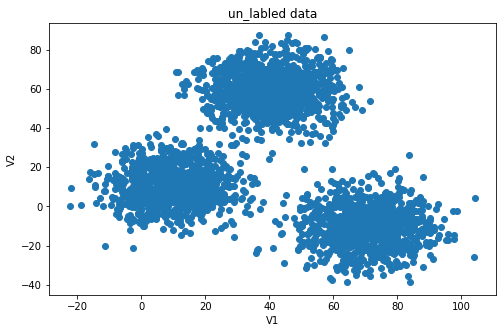

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize =(8,5))
plt.scatter(X.V1, X.V2)
plt.title('un_labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

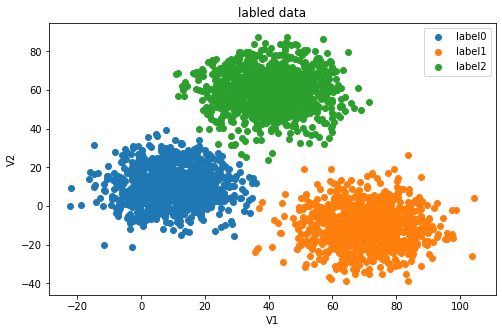

In [10]:
fig2 = plt.figure(figsize=(8,5))
label0 = plt.scatter(X.V1[y ==0],X.V2[y ==0])
label1 = plt.scatter(X.V1[y ==1],X.V2[y ==1])
label2 = plt.scatter(X.V1[y ==2],X.V2[y ==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

In [6]:
print(X.shape,y.shape)

(3000, 2) (3000,)


## Set up a model and train

### train the model

In [13]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=0)
KM.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### visualize the centers

In [14]:
centers = KM.cluster_centers_
centers

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

**This is how to select rows and columns in a 2D numpy array** `(centers[:,0], centers[:,1])`

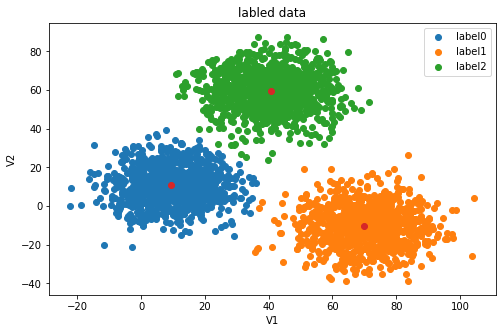

In [19]:
fig3 = plt.figure(figsize=(8,5))
label0 = plt.scatter(X.V1[y ==0],X.V2[y ==0])
label1 = plt.scatter(X.V1[y ==1],X.V2[y ==1])
label2 = plt.scatter(X.V1[y ==2],X.V2[y ==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))

plt.scatter(centers[:,0], centers[:,1])
plt.show()

Plot的顺序很重要。 后面的有可能覆盖前面的

## Test data

In [21]:
#V1=80,V2=60
y_predicted = KM.predict([[80,60]])
y_predicted

array([1], dtype=int32)

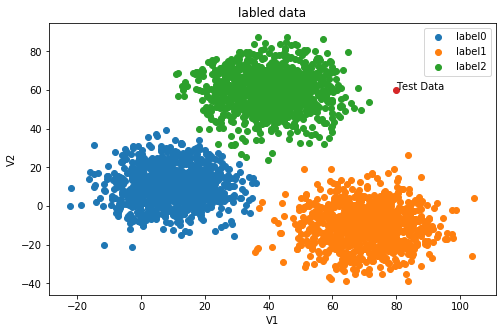

In [23]:
fig3 = plt.figure(figsize=(8,5))
label0 = plt.scatter(X.V1[y ==0],X.V2[y ==0])
label1 = plt.scatter(X.V1[y ==1],X.V2[y ==1])
label2 = plt.scatter(X.V1[y ==2],X.V2[y ==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))

plt.scatter(80,60)
plt.text(80,60, 'Test Data')
plt.show()

In [11]:
#predict based on training data
y_predict = KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(y))

1    1149
0     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.0023333333333333335


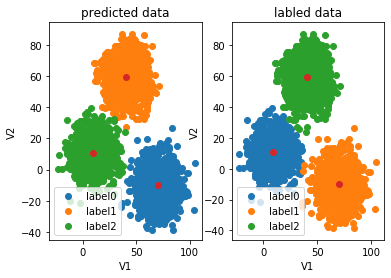

In [13]:
#visualize the data and results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])

plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [14]:
#correct the results
y_corrected = []
for i in y_predict:
    if i==0:
        y_corrected.append(1)
    elif i==1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_corrected),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [15]:
print(accuracy_score(y,y_corrected))

0.997


In [16]:
y_corrected = np.array(y_corrected)
print(type(y_corrected))

<class 'numpy.ndarray'>


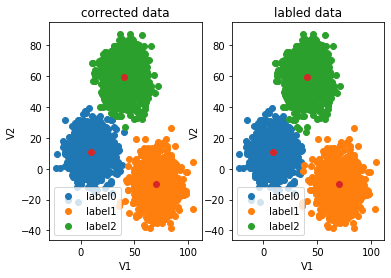

In [17]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_corrected==0],X.loc[:,'V2'][y_corrected==0])
label1 = plt.scatter(X.loc[:,'V1'][y_corrected==1],X.loc[:,'V2'][y_corrected==1])
label2 = plt.scatter(X.loc[:,'V1'][y_corrected==2],X.loc[:,'V2'][y_corrected==2])

plt.title("corrected data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [18]:
#establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
#predict based on the test data V1=80, V2=60
y_predict_knn_test = KNN.predict([[80,60]])
y_predict_knn = KNN.predict(X)
print(y_predict_knn_test)
print('knn accuracy:',accuracy_score(y,y_predict_knn))

[2]
knn accuracy: 1.0


In [20]:
print(pd.value_counts(y_predict_knn),pd.value_counts(y))

2    1156
1     954
0     890
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


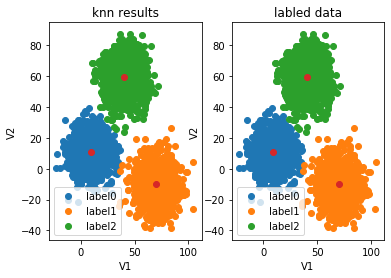

In [21]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_knn==0],X.loc[:,'V2'][y_predict_knn==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_knn==1],X.loc[:,'V2'][y_predict_knn==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_knn==2],X.loc[:,'V2'][y_predict_knn==2])

plt.title("knn results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [22]:
#try meanshift model
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X,n_samples=500)
print(bw)

30.84663454820215


In [23]:
#establish the meanshift model-un-supervised model
ms = MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [24]:
y_predict_ms = ms.predict(X)
print(pd.value_counts(y_predict_ms),pd.value_counts(y))

0    1149
1     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [25]:
print(centers)#kmeans聚类中心

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


In [26]:
#新增代码 打印使用meanshift算法获取的聚类中心 与kmeans算法对比 中心点非常接近
centers2 = ms.cluster_centers_
print(centers2)#meanshift聚类中心

[[ 40.60158864  59.65137971]
 [ 70.01854306 -10.11803404]
 [  9.56752568  10.79316266]]


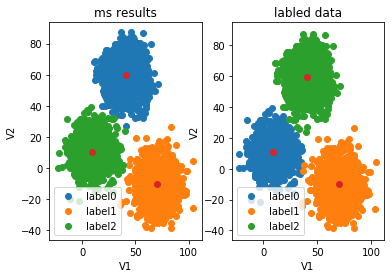

In [27]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_ms==0],X.loc[:,'V2'][y_predict_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_ms==1],X.loc[:,'V2'][y_predict_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_ms==2],X.loc[:,'V2'][y_predict_ms==2])

plt.title("ms results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [28]:
#correct the results
y_corrected_ms = []
for i in y_predict_ms:
    if i==0:
        y_corrected_ms.append(2)
    elif i==1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.value_counts(y_corrected_ms),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [29]:
#convert the results to numpy array
y_corrected_ms = np.array(y_corrected_ms)
print(type(y_corrected_ms))

<class 'numpy.ndarray'>


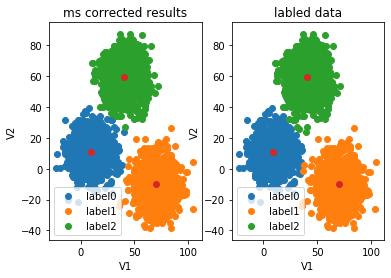

In [30]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==0],X.loc[:,'V2'][y_corrected_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==1],X.loc[:,'V2'][y_corrected_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==2],X.loc[:,'V2'][y_corrected_ms==2])

plt.title("ms corrected results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()